# Python Database Programming Exercise

This Database exercise Project will help Python developers to learn database programming skills quickly. In this exercise, we will perform database CRUD operations using Python.

**This Python database programming exercise includes: –**

Now it has 5 exercise questions, which simulate the real-time queries, and each question contains a specific skill you need to learn. When you complete the exercise, you get more familiar with database operations in Python.

In [1]:
import sqlite3
import datetime
from dateutil.relativedelta import relativedelta
dbpath=r'C:\MyLearn\Databases\Hospital.db'

## Project: Hospital Information System

* Step 1: CREATE database python_db;
* Step 2: Create Hospital Table
* Step 3: Create Doctor Table

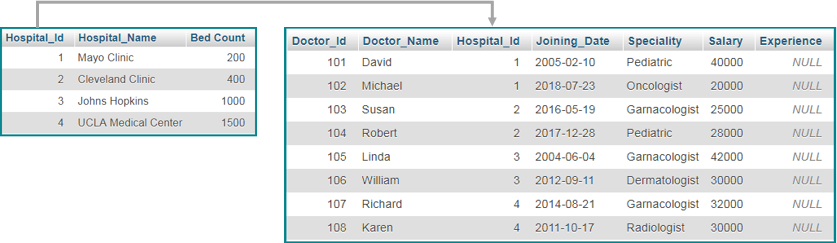

---

### Creation of Required Tables and Data

##### ** Run Before Starting your Exercises **

In [2]:
try:
    sqliteConnection = sqlite3.connect(dbpath)
    cursor = sqliteConnection.cursor()
    print("Successfully Connected to SQLite")
    
    create_table_Hospital = '''CREATE TABLE Hospital (
                                Hospital_Id INT UNSIGNED NOT NULL, 
                                Hospital_Name TEXT NOT NULL, 
                                Bed_Count INT, 
                                PRIMARY KEY (Hospital_Id));'''
 
    create_table_Doctor = '''CREATE TABLE Doctor(
                               Doctor_Id INT UNSIGNED NOT NULL,
                               Doctor_Name TEXT NOT NULL, 
                               Hospital_Id INT NOT NULL, 
                               Joining_Date DATE NOT NULL, 
                               Speciality TEXT NULL, 
                               Salary INT NULL, 
                               Experience INT NULL, 
                               PRIMARY KEY (Doctor_Id));'''
    Hospital_records = [
        (1, 'Mayo Clinic', 200),
        (2, 'Cleveland Clinic', 400), 
        (3, 'Johns Hopkins', 1000), 
        (4, 'UCLA Medical Center', 1500)]

    Doctor_records=[
        (101, 'David', 1, '2005-2-10', 'Pediatric', '40000'),
        (102, 'Michael', 1, '2018-07-23', 'Oncologist', '20000'), 
        (103, 'Susan', 2, '2016-05-19', 'Garnacologist', '25000'), 
        (104, 'Robert', 2, '2017-12-28', 'Pediatric ', '28000'), 
        (105, 'Linda', 3, '2004-06-04', 'Garnacologist', '42000'), 
        (106, 'William', 3, '2012-09-11', 'Dermatologist', '30000'), 
        (107, 'Richard', 4, '2014-08-21', 'Garnacologist', '32000'), 
        (108, 'Karen', 4, '2011-10-17', 'Radiologist', '30000')]

    Hospital_record_insert = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES (?,?,?);'''
    
    Doctor_record_insert ='''
    INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary) 
    VALUES (?,?,?,?,?,?);'''
    
    cursor.execute( create_table_Hospital)
    cursor.execute(create_table_Doctor)
    cursor.executemany(Hospital_record_insert, Hospital_records)
    cursor.executemany(Doctor_record_insert, Doctor_records)
    sqliteConnection.commit()
    
    print("SQLite table created, Records Inserted for Exercise")

    cursor.close()

except sqlite3.Error as error:
    print("Error while creating a sqlite table", error)

finally:
    if sqliteConnection:
        sqliteConnection.close()
        print("sqlite connection is closed")

Successfully Connected to SQLite
SQLite table created, Records Inserted for Exercise
sqlite connection is closed


---

### Exercise 1: Connect to your database server and print its version

* Write SQL query to get the database server version.
* Connect to the database and use cursor.execute() to execute this query.
* Next, use cursor.fetchone() to fetch the record.




In [3]:
try:
    sqliteConnection = sqlite3.connect(dbpath)
    cursor = sqliteConnection.cursor()
    sqltxt = "select sqlite_version();"
    cursor.execute(sqltxt)
    dbversion = cursor.fetchone()
    print("SQLite Database Version is", dbversion[0])
    cursor.close()
    
except sqlite3.Error as error:
    print("Error:", error)

finally:
    if sqliteConnection:
        sqliteConnection.close()

SQLite Database Version is 3.37.0


---

#### Question 2: Fetch Hospital and Doctor Information using hospital Id and doctor Id
Implement the functionality to read the details of a given doctor from the doctor table and Hospital from the hospital table. i.e., read records from Hospital and Doctor Table as per given hospital Id and Doctor Id.

* Connect to python_db and use cursor.execute() to execute the parameterized query.
* Next, use cursor.fetchall() to fetch the record.
* Next, iterate record/resultSet to print all column values

**Input**
def get_hospital_detail(hospital_id):
    #Read data from Hospital table

def get_doctor_detail(doctor_id):
    # Read data from Doctor table

get_hospital_details(2)
get_doctor_details(105)


**Output**
Question 2: Read given hospital and doctor details 
Printing Hospital record
Hospital Id: 2
Hospital Name: Cleveland Clinic
Bed Count: 400

Printing Doctor record
Doctor Id: 105
Doctor Name: Linda
Hospital Id: 3
Joining Date: 2004-06-04
Specialty: Garnacologist
Salary: 42000
Experience: None

In [4]:
def get_hospital_details(hospital_id): 
    try:
        sqliteConnection = sqlite3.connect(dbpath)
        cursor = sqliteConnection.cursor()
        sqltxt = "select * from hospital where hospital_id=?;"
        cursor.execute(sqltxt, (hospital_id,))
        records = cursor.fetchone()
        print("Question 2: Read given hospital and doctor details ")
        print("Printing Hospital record")
        print("Hospital Id: ",records[0])
        print("Hospital Name: ",records[1])
        print("Bed Count: ",records[2])
        cursor.close()
        
    except sqlite3.Error as error:
        print("Error Occured:", error)
        
    finally:
        if sqliteConnection:
            sqliteConnection.close()

def get_doctor_details(doctor_id): 
    try:
        sqliteConnection = sqlite3.connect(dbpath)
        cursor = sqliteConnection.cursor()
        sqltxt = "select * from doctor where doctor_id=?;"
        cursor.execute(sqltxt, (doctor_id,))
        records = cursor.fetchone()
        print("\n")
        print("Printing Doctor record")
        print("Doctor Id: ", records[0])
        print("Doctor Name: ",records[1])
        print("Hospital Id: ",records[2])
        print("Joining Date: ",records[3])
        print("Specialty: ",records[4])
        print("Salary: ",records[5])
        print("Experience:",records[6])

        cursor.close()
        
    except sqlite3.Error as error:
        print("Error Occured:", error)
        
    finally:
        if sqliteConnection:
            sqliteConnection.close()

            
get_hospital_details(2)
get_doctor_details(105)

Question 2: Read given hospital and doctor details 
Printing Hospital record
Hospital Id:  2
Hospital Name:  Cleveland Clinic
Bed Count:  400


Printing Doctor record
Doctor Id:  105
Doctor Name:  Linda
Hospital Id:  3
Joining Date:  2004-06-04
Specialty:  Garnacologist
Salary:  42000
Experience: None


---

#### Exercise 3: Get the list Of doctors as per the given specialty and salary

Note: Fetch all doctors whose salary higher than the input amount and specialty is the same as the input specialty.

**Hint**

Define the parameterized select query to fetch data from the table as per the given specialty and salary.
Next, use the cursor.execute() to execute the query.
Next, get all records using cursor.fetchall()
Iterate those records and print each row.


**Given:**
def get_specialist_doctors_list(speciality, salary):
    #Fetch doctor's details as per Speciality and Salary
    
get_specialist_doctors_list("Garnacologist", 30000)



**Expected output**
Printing doctors whose specialty is Garnacologist and salary greater than 30000 
Doctor Id:  105
Doctor Name: Linda
Hospital Id: 3
Joining Date: 2004-06-04
Specialty: Garnacologist
Salary: 42000
Experience: None 
 
Doctor Id:  107
Doctor Name: Richard
Hospital Id: 4
Joining Date: 2014-08-21
Specialty: Garnacologist
Salary: 32000
Experience: None 


In [5]:
def get_specialist_doctors_list(speciality, Salary):
    try:
        sqliteConnection = sqlite3.connect(dbpath)
        cursor = sqliteConnection.cursor()
        sqltxt ="select * from Doctor where Speciality = ? and Salary>?;"
        cursor.execute(sqltxt,(speciality, Salary,))
        records = cursor.fetchall()
        print("Printing doctors whose specialty is Garnacologist and salary greater than 30000")
        for rows in records:
            print("Doctor Id:", rows[0])
            print("Doctor Name:", rows[1])
            print("Hospital Id:", rows[2])
            print("Joining Date: ", rows[3])
            print("Specialty: ", rows[4])
            print("Salary: ", rows[5])
            print("Experience: ",  rows[6])
            print("\n")
        cursor.close()
        
    except sqlite3.Error as error:
        print("Error Occured:", error)
    
    finally:
        if sqliteConnection:
            sqliteConnection.close()
    
get_specialist_doctors_list("Garnacologist", 30000)

Printing doctors whose specialty is Garnacologist and salary greater than 30000
Doctor Id: 105
Doctor Name: Linda
Hospital Id: 3
Joining Date:  2004-06-04
Specialty:  Garnacologist
Salary:  42000
Experience:  None


Doctor Id: 107
Doctor Name: Richard
Hospital Id: 4
Joining Date:  2014-08-21
Specialty:  Garnacologist
Salary:  32000
Experience:  None




---

#### Exercise 4: Get a list of doctors from a given hospital

Note: Implement the functionality to fetch all the doctors as per the given Hospital Id. You must display the hospital name of a doctor.

Given:
def get_doctors(hospital_id):
    #Fetch All doctors within given Hospital

get_doctors(2)

Hint:
Define the parameterized select query to get the hospital name as per the given hospital id.
Next, use the cursor.execute() to execute this query and store the hospital name in a variable.
Define the parameterized select query to fetch all doctors from the doctor table as per the given hospital id.
Next, use the cursor.execute() to execute the query.
Next, get all records using cursor.fetchall()
Iterate those records and print each column. Also, display the hospital name we fetched in the first query in each doctor’s entry


In [6]:
def get_doctors(hospital_id):
    try:
        sqliteConnection = sqlite3.connect(dbpath)
        cursor = sqliteConnection.cursor()
        sqltxt ="""select  
                        a.hospital_id,
                        b.hospital_name,
                        a.doctor_id,
                        a.doctor_name,
                        a.joining_date,
                        a.speciality,
                        a.salary,
                        a.experience
                    from 
                        Doctor a,
                        Hospital b
                    Where
                        a.hospital_id = b.hospital_id and
                        a.hospital_id=?;"""
        
        cursor.execute(sqltxt,(hospital_id,))
        records = cursor.fetchall()
        print("Printing doctors whose specialty is Garnacologist and salary greater than 30000")
        for rows in records:
            print("Hospital Id:", rows[0])
            print("Hospital Name:", rows[1])
            print("Doctor Id:", rows[2])
            print("Doctor Name:", rows[3])
            print("Joining Date: ", rows[4])
            print("Specialty: ", rows[5])
            print("Salary: ", rows[6])
            print("Experience: ",  rows[7])
            print("\n")
        cursor.close()
        
    except sqlite3.Error as error:
        print("Error Occured:", error)
    
    finally:
        if sqliteConnection:
            sqliteConnection.close()

get_doctors(2)


Printing doctors whose specialty is Garnacologist and salary greater than 30000
Hospital Id: 2
Hospital Name: Cleveland Clinic
Doctor Id: 103
Doctor Name: Susan
Joining Date:  2016-05-19
Specialty:  Garnacologist
Salary:  25000
Experience:  None


Hospital Id: 2
Hospital Name: Cleveland Clinic
Doctor Id: 104
Doctor Name: Robert
Joining Date:  2017-12-28
Specialty:  Pediatric 
Salary:  28000
Experience:  None




---

#### Operation 5: Update doctor experience in years

The value of the experience column for each doctor is `null`. Implement the functionality to update the experience of a given doctor in years.

Given:
def def update_doctor_experience(doctor_id):
    # Update Doctor Experience in Years

update_doctor_experience(101)

Hint

The doctor table has the joining date for each doctor.
Get a given doctor’s joining date.
To get a difference in a year, we can calculate the difference between today’s date and joining-date in years.
After calculating the difference in a year, you can execute the update table query to update the experience of a given doctor.


Expected Output
Before:
Printing Doctor record

Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date: 2005-02-10
Specialty: Pediatric
Salary: 40000
Experience: None


After:
Printing Doctor record

Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date: 2005-02-10
Specialty: Pediatric
Salary: 40000
Experience: 15

In [7]:
def update_doctor_experience(doctor_id):
    try:
        sqliteConnection = sqlite3.connect(dbpath)
        cursor = sqliteConnection.cursor()
        sqltxt2 ="""update Doctor set Experience =? where doctor_id=?;"""
        sqltxt1="""select * from doctor where doctor_id=?;"""
                        
        cursor.execute(sqltxt1,(doctor_id,))
        records = cursor.fetchone()
        print("Printing doctors record before update")
        print("Doctor Id:", records[0])
        print("Doctor Name:", records[1])
        print("Hospital Id:", records[2])
        print("Joining Date: ", records[3])
        print("Specialty: ", records[4])
        print("Salary: ", records[5])
        print("Experience: ",  records[6])
        print("\n")
        joining_date =records[3]

        # calculate Experience in years
        joining_date_1 = datetime.datetime.strptime(''.join(map(str, joining_date)), '%Y-%m-%d')
        today_date = datetime.datetime.now()
        experience = relativedelta(today_date, joining_date_1).years
        
        cursor.execute(sqltxt2,(experience, doctor_id,))
        sqliteConnection.commit()
        
        cursor.execute(sqltxt1,(doctor_id,))
        records = cursor.fetchone()
        print("Printing doctors record After update")
        print("Doctor Id:", records[0])
        print("Doctor Name:", records[1])
        print("Hospital Id:", records[2])
        print("Joining Date: ", records[3])
        print("Specialty: ", records[4])
        print("Salary: ", records[5])
        print("Experience: ",  records[6])
        print("\n")
            
            
        cursor.close()
        
    except sqlite3.Error as error:
        print("Error Occured:", error)
    
    finally:
        if sqliteConnection:
            sqliteConnection.close()

update_doctor_experience(101)


Printing doctors record before update
Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date:  2005-2-10
Specialty:  Pediatric
Salary:  40000
Experience:  None


Printing doctors record After update
Doctor Id: 101
Doctor Name: David
Hospital Id: 1
Joining Date:  2005-2-10
Specialty:  Pediatric
Salary:  40000
Experience:  16




---